In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

# Загрузка данных и первичный анализ

In [2]:
net = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S05/S05-hw-dataset.csv'
df = pd.read_csv(net)

In [3]:
df.shape

(3000, 17)

In [4]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [6]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [7]:
df["default"].value_counts()

default
0    1769
1    1231
Name: count, dtype: int64

In [9]:
df["default"].value_counts(normalize=True) # Доля классов

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

In [10]:
df.isna().sum().sort_values(ascending=False).head(20)

client_id                         0
age                               0
income                            0
years_employed                    0
credit_score                      0
debt_to_income                    0
num_credit_cards                  0
num_late_payments                 0
has_mortgage                      0
has_car_loan                      0
savings_balance                   0
checking_balance                  0
region_risk_score                 0
phone_calls_to_support_last_3m    0
active_loans                      0
customer_tenure_years             0
default                           0
dtype: int64

Датасет содержит около 3000 объектов и ≈17–18 признаков, включая целевую переменную default (без учёта технического идентификатора client_id).
Все признаки имеют числовой тип; явных аномалий или невозможных значений (например, отрицательного возраста или выхода debt_to_income за диапазон [0, 1]) не обнаружено.
Целевая переменная распределена умеренно несбалансированно: доля класса default = 1 составляет примерно 40%, а default = 0 — около 60%, что делает задачу бинарной классификации нетривиальной, но без экстремального перекоса классов.

# Подготовка признаков и таргета

In [11]:
drop_cols = ["client_id", "default"]

X = df.drop(columns=drop_cols)
y = df["default"]

In [12]:
X.dtypes.value_counts()

int64      13
float64     2
Name: count, dtype: int64

In [13]:
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
non_numeric


[]

# Train/Test-сплит и бейзлайн-модель

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

In [18]:
X_train.shape, X_test.shape

((2400, 15), (600, 15))

In [19]:
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

,strategy,'most_frequent'
,random_state,42
,constant,None


In [20]:
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

In [21]:
acc_dummy = accuracy_score(y_test, y_pred_dummy)
auc_dummy = roc_auc_score(y_test, y_proba_dummy)

In [22]:
acc_dummy, auc_dummy

(0.59, 0.5)

# Логистическая регрессия и подбор гиперпараметров

In [23]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        max_iter=1000,
        random_state=42,
        solver="lbfgs"
    ))
])

In [24]:
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]
}

In [25]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [26]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'logreg__C': [0.01, 0.1, ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [27]:
grid.best_params_, grid.best_score_

({'logreg__C': 100.0}, np.float64(0.8606625890118563))

In [28]:
best_model = grid.best_estimator_

In [29]:
y_pred_lr = best_model.predict(X_test)
y_proba_lr = best_model.predict_proba(X_test)[:, 1]

In [30]:
acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

In [31]:
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

In [32]:
acc_lr, auc_lr, prec_lr, rec_lr, f1_lr

(0.8016666666666666,
 0.87564879886087,
 0.7953488372093023,
 0.6951219512195121,
 0.7418655097613883)

In [33]:
confusion_matrix(y_test, y_pred_lr)

array([[310,  44],
       [ 75, 171]])

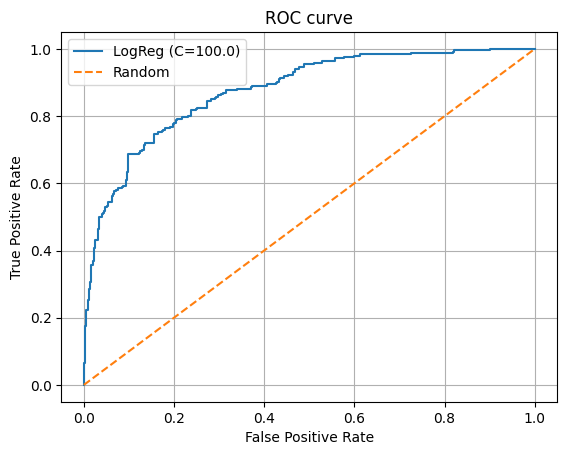

'figures/roc_curve_logreg.png'

In [34]:
os.makedirs("figures", exist_ok=True)

fpr, tpr, _ = roc_curve(y_test, y_proba_lr)

plt.figure()
plt.plot(fpr, tpr, label=f"LogReg (C={grid.best_params_['logreg__C']})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.grid(True)

out_path = "figures/roc_curve_logreg.png"
plt.savefig(out_path, dpi=200, bbox_inches="tight")
plt.show()

out_path

# Сравнение бейзлайна и логистической регрессии, текстовые выводы

In [35]:
summary = pd.DataFrame([
    {"model": "Dummy (most_frequent)", "accuracy": acc_dummy, "roc_auc": auc_dummy},
    {"model": f"LogReg (C={grid.best_params_['logreg__C']})", "accuracy": acc_lr, "roc_auc": auc_lr},
])

summary

,model,accuracy,roc_auc
0,Dummy (most_frequent),0.590000,0.500000
1,LogReg (C=100.0),0.801667,0.875649


In [36]:
cv_results = pd.DataFrame(grid.cv_results_)[
    ["param_logreg__C", "mean_test_score", "std_test_score", "rank_test_score"]
].sort_values("rank_test_score")

cv_results


,param_logreg__C,mean_test_score,std_test_score,rank_test_score
4,100.00,0.860663,0.008987,1
3,10.00,0.860659,0.008981,2
2,1.00,0.860659,0.008967,3
1,0.10,0.860605,0.009034,4
0,0.01,0.860293,0.009331,5


# Вывод